In [14]:
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px 

import pandas as pd

from a2c.a2c import A2C
from a2c.callback import ProgressBarCallback
from environments.continuous_teaching import ContinuousTeaching
from human_agents import generate_agents
from test_a2c import produce_rates

In [59]:
def run_one_episode(env, policy, user):
    obs = env.reset_for_new_user(user)
    rewards = []
    actions = []
    env.penalty_coeff=0.0
    while True:
        action = policy.act(obs)
        obs, reward, done, info = env.step(action)

        rewards.append(reward)
        actions.append(action[0])

        if done:
            obs = env.reset()
            break

    return rewards, actions

In [3]:
def teach_in_sessions(env, session_lengths):
    rewards = []
    actions = []
    models = []
    for session_length in session_lengths:
        model = A2C(env, seed=123)
        models += [model]
        env.t_max = session_length

        iterations =1000000
        check_freq = env.t_max

        with ProgressBarCallback(env, check_freq) as callback:
            model.learn(iterations, callback=callback)

        plt.plot([np.mean(r) for r in callback.hist_rewards])
        plt.show()

        r, a = run_one_episode(env, model)
        rewards += [np.array(r)]
        actions += [np.array(a)]

    return rewards, actions, models

In [17]:
session_lengths = [10, 20, 40, 70, 100, 200]

0it [00:00, ?it/s]

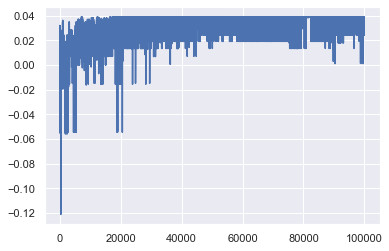

0it [00:00, ?it/s]

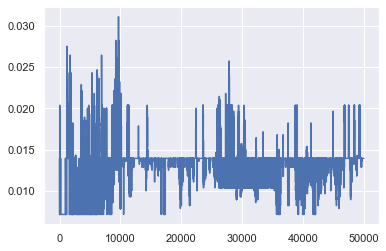

0it [00:00, ?it/s]

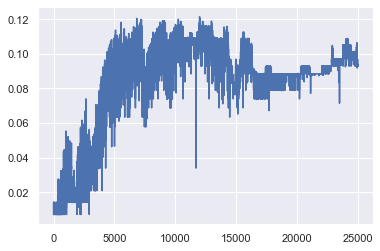

0it [00:00, ?it/s]

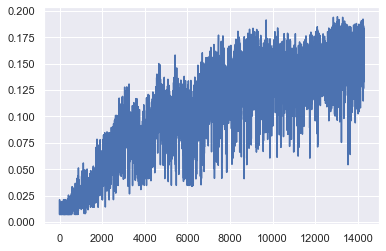

0it [00:00, ?it/s]

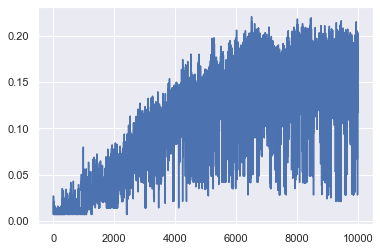

0it [00:00, ?it/s]

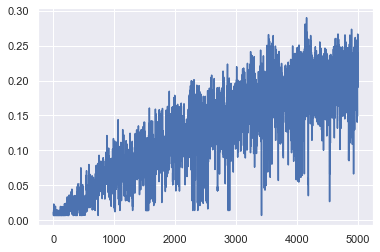

In [4]:
n_users = 10
n_items = 140
forget_rates, repetition_rates = generate_agents(n_users, n_items)
env = ContinuousTeaching(
    t_max=100,
    initial_forget_rates=forget_rates,
    initial_repetition_rates=repetition_rates,
    n_item=n_items,
    tau=0.9,
    delta_coeffs=np.array([3, 20]),
    n_coeffs=2,
    penalty_coeff=0.4
)
r, a, m=teach_in_sessions(env, session_lengths)


In [115]:
aa = []
j = 2
for i in range(6):
    rewards, actions = run_one_episode(env, m[i], j)
#     print(rewards, actions)
    item_count = [actions.count(x)+1 for x in range(n_items)]
    shown = [bool(actions.count(x) > 0) for x in range(n_items)]
    df = pd.DataFrame(zip(env.all_forget_rates[j], env.all_repetition_rates[j], item_count, shown))
    df.columns=['forget', 'repeat', 'counter', 'shown']
    df['shown']=df['shown'].astype('str')
    fig = px.scatter(df, x="forget", y="repeat",
                     size="counter", color='shown',log_x=True, #log_y=True,
                      size_max=50, title='Number of occurances, length:{} , user:{}'.format(session_lengths[i], j))

    fig.show()

In [31]:
pip install -U kaleido

Requirement already up-to-date: kaleido in /u/83/rismans1/unix/ActiveTeachingCollaborative/all/lib/python3.8/site-packages (0.2.1)
Note: you may need to restart the kernel to use updated packages.


In [10]:
    item_count = [actions.count(x)+0.1 for x in range(n_items)]
    shown = [bool(actions.count(x) > 0) for x in range(n_items)]
    df = pd.DataFrame(zip(env.initial_forget_rates, env.initial_repetition_rates, item_count, shown))
    df.columns=['forget', 'repeat', 'counter', 'shown']
    df['shown']=df['shown'].astype('str')
    fig = px.scatter(df, x="forget", y="repeat",
                 size="counter", color='shown', log_y=True, log_x=True, size_max=50,
                    title='Number of occurances only for shown ones, {}, {}'.format(session_lengths[i], j))


NameError: name 'actions' is not defined